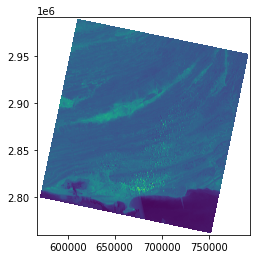

<Axes: >

In [1]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("E:\MHS labs\ormara i9.tif")
show(img)
# pixels = img.load()

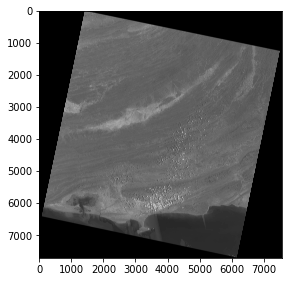

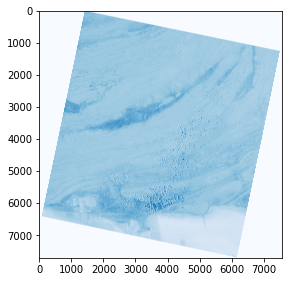

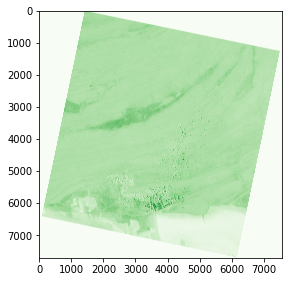

In [3]:
#READING MULTIPLE COLORED BANDS
#Grey Band
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='gray')
plt.show()
#Blue band
import matplotlib.pyplot as plt
img_band2 = img.read(2)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='Blues')
plt.show()
#Green Band
import matplotlib.pyplot as plt
img_band3 = img.read(3)
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(2, 2, 3)
ax3.imshow(img_band3, cmap='Greens')
plt.show()

In [4]:
#Readin Band numbers and Image size
import rasterio
with rasterio.open("E:\MHS labs\ormara i9.tif") as dataset:
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 7571 x 7711
Number of Bands: 3


In [5]:
# OBTAINING META DATA
img.crs
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7571, 'height': 7711, 'count': 3, 'crs': CRS.from_epsg(32641), 'transform': Affine(30.0, 0.0, 566985.0,
       0.0, -30.0, 2991315.0)}


In [6]:
#OBTAINING IMAGE DESCRIPTION
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))

Raster Decription: (None, None, None)



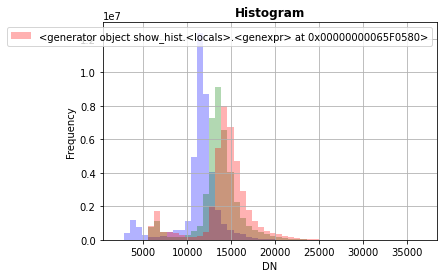

In [7]:
#Histogram of pixel vaLues in each band 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

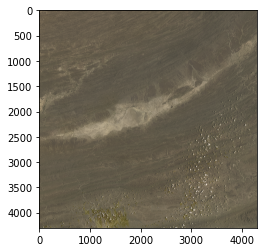

In [20]:
#CLIPPING SPECIFIC REGION FROM A RASTER
import rasterio
import numpy as np
import matplotlib.pyplot as plt
with rasterio.open('E:\MHS labs\ormara i9.tif', 'r') as src:
    img = src.read()
# Clipping the region from rows 400 to 950 and columns 400 to 950
clipped_img = img[:, 1200:5500, 1200:5500]
# This convert pixels value to float and replace NaN values to float value 0.0
clipped_img = clipped_img.astype(float)
clipped_img[np.isnan(clipped_img)] = 0.0  # Replace NaNs with 0
# This Normalizes the clipped image to [0, 1]
min_val = np.nanmin(clipped_img)
max_val = np.nanmax(clipped_img)
clipped_img = (clipped_img - min_val) / (max_val - min_val)

plt.imshow(clipped_img.transpose(1, 2, 0))
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_1480\3973758836.py:4: RuntimeWarning: invalid value encountered in true_divide
  ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
C:\Users\HP\AppData\Local\Temp\ipykernel_1480\3973758836.py:6: RuntimeWarning: invalid value encountered in true_divide
  ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))


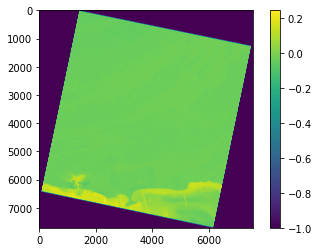

In [21]:
#Calculating NDVI
red_clipped = img[0].astype('f4')
nir_clipped = img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()